In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *

2023-05-17 13:19:12.051772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 13:19:12.587981: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-17 13:19:12.588025: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-17 13:19:12.588029: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  # Restrict TensorFlow to only allocate 10GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
combined_preds = pd.read_csv('/data2/predictions/HSC_v6_NN_neurips_combined_with_5pool_v15/testing_predictions.csv')
cnn_preds = pd.read_csv('/data2/predictions/HSC_v6_CNN5pool_v4/testing_predictions.csv')
nn_preds = pd.read_csv('/data2/predictions/HSC_v6_NN_subnetwork_v1/testing_predictions.csv')

In [4]:
combined_metrics = get_point_metrics(combined_preds['photoz'], combined_preds['specz'], binned=True)
cnn_metrics = get_point_metrics(cnn_preds['photoz'], cnn_preds['specz'], binned=True)
nn_metrics = get_point_metrics(nn_preds['photoz'], nn_preds['specz'], binned=True)

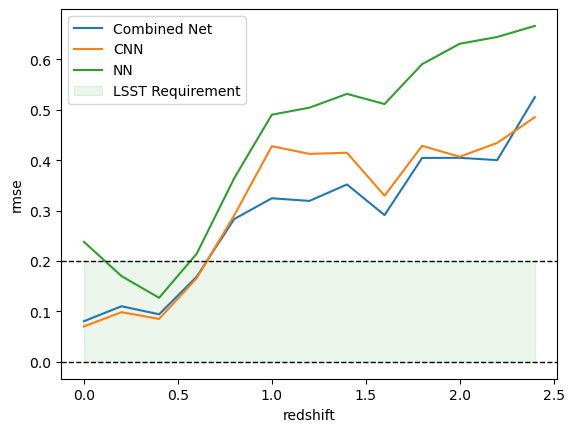

In [5]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(combined_metrics['mse'][0:13]), label='Combined Net')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(cnn_metrics['mse'][0:13]), label='CNN')
sns.lineplot(x=np.arange(0,2.6,0.2), y=np.sqrt(nn_metrics['mse'][0:13]), label='NN')
plt.axhline(y=0.2, color='black', linestyle='--', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.fill_between(np.arange(0,2.6,0.2), 0.2, 0, alpha = 0.08, color = 'green', label='LSST Requirement')
plt.ylabel('rmse')
plt.xlabel('redshift')
plt.legend()

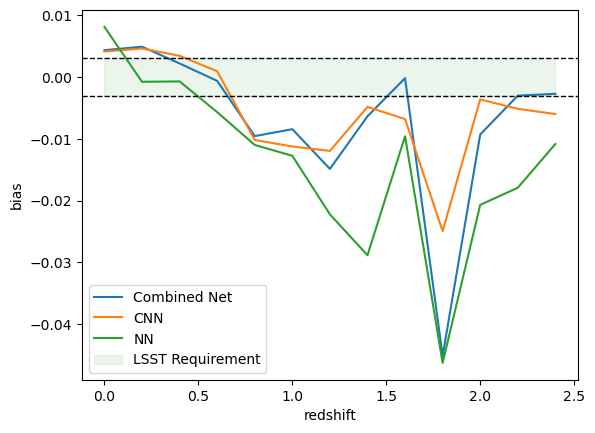

In [6]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=combined_metrics['bias_conv'][0:13], label='Combined Net')
sns.lineplot(x=np.arange(0,2.6,0.2), y=cnn_metrics['bias_conv'][0:13], label='CNN')
sns.lineplot(x=np.arange(0,2.6,0.2), y=nn_metrics['bias_conv'][0:13], label='NN')
plt.axhline(y=0.003, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-0.003, color='black', linestyle='--', linewidth=1)
plt.fill_between(np.arange(0,2.6,0.2), 0.003,-0.003, alpha = 0.08, color = 'green', label='LSST Requirement')
plt.ylabel('bias')
plt.xlabel('redshift')
plt.legend()

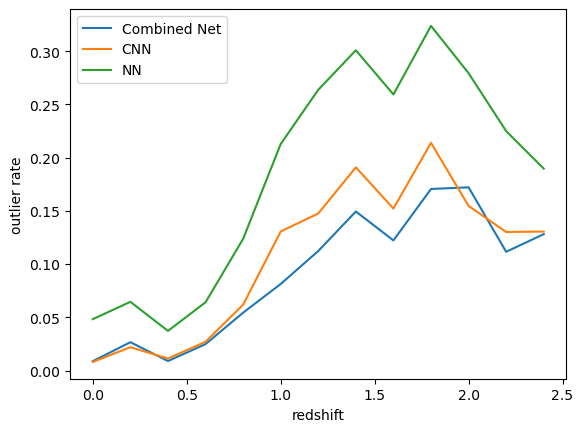

In [7]:
sns.lineplot(x=np.arange(0,2.6,0.2), y=combined_metrics['outlier_conv'][0:13], label='Combined Net')
sns.lineplot(x=np.arange(0,2.6,0.2), y=cnn_metrics['outlier_conv'][0:13], label='CNN')
sns.lineplot(x=np.arange(0,2.6,0.2), y=nn_metrics['outlier_conv'][0:13], label='NN')
plt.ylabel('outlier rate')
plt.xlabel('redshift')
plt.legend()

In [8]:
combined_metrics_nobin = pd.read_csv('/data2/predictions/HSC_v6_NN_neurips_combined_with_5pool_v15/testing_metrics.csv')
cnn_metrics_nobin = pd.read_csv('/data2/predictions/HSC_v6_CNN5pool_v4/testing_metrics.csv')
nn_metrics_nobin = pd.read_csv('/data2/predictions/HSC_v6_NN_subnetwork_v1/testing_metrics.csv')

In [9]:
combined_metrics_nobin

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv,mse
0,"(0.0, 4.0]",42960,0.057983,0.001557,0.001757,0.022596,0.019766,0.125652,0.035801,0.052974


In [10]:
cnn_metrics_nobin

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv,mse
0,"(0.0, 4.0]",42960,0.056821,0.002055,0.0024,0.020513,0.017445,0.137803,0.036778,0.048397


In [11]:
nn_metrics_nobin

,zspec_bin,count,L,bias_bw,bias_conv,scatter_bw,scatter_conv,outlier_bw,outlier_conv,mse
0,"(0.0, 4.0]",42960,0.124483,-0.001322,-0.000883,0.042308,0.033881,0.161802,0.083776,0.10504
